In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data from CSV file
df = pd.read_csv("/Users/Radja/Desktop/data_stocks.csv")

# Display the first lines of the dataframe
print(df.head())

         DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0  1491226200  2363.6101     42.3300     143.6800     129.6300      82.040   
1  1491226260  2364.1001     42.3600     143.7000     130.3200      82.080   
2  1491226320  2362.6799     42.3100     143.6901     130.2250      82.030   
3  1491226380  2364.3101     42.3700     143.6400     130.0729      82.000   
4  1491226440  2364.8501     42.5378     143.6600     129.8800      82.035   

   NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  NYSE.WYN  NYSE.XEC  \
0    102.2300      85.2200       59.760       121.52  ...    84.370   119.035   
1    102.1400      85.6500       59.840       121.48  ...    84.370   119.035   
2    102.2125      85.5100       59.795       121.93  ...    84.585   119.260   
3    102.1400      85.4872       59.620       121.44  ...    84.460   119.260   
4    102.0600      85.7001       59.620       121.60  ...    84.470   119.610   

   NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NY

In [4]:
# List of columns to keep in the dataframe
columns_to_keep = ['DATE', 'SP500']

# Delete columns other than those to be retained
df.drop(columns=[col for col in df.columns if col not in columns_to_keep], inplace=True)

# Display le dataframe 
print(df.head())

         DATE      SP500
0  1491226200  2363.6101
1  1491226260  2364.1001
2  1491226320  2362.6799
3  1491226380  2364.3101
4  1491226440  2364.8501


In [5]:
df1= df['SP500']
df1

0        2363.6101
1        2364.1001
2        2362.6799
3        2364.3101
4        2364.8501
           ...    
41261    2472.2200
41262    2471.7700
41263    2470.0300
41264    2471.4900
41265    2471.4900
Name: SP500, Length: 41266, dtype: float64

la colonne "Date" semble être représentée sous forme d'un timestamp Unix, qui est le nombre de secondes écoulées depuis le 1er janvier 1970. on pout utiliser la fonction from_unixtime du module datetime de Python pour convertir ces timestamps en objets de type datetime.

In [6]:
#convert timestamps to datetime
df = df['DATE'].astype('datetime64[s]')
df

0       2017-04-03 13:30:00
1       2017-04-03 13:31:00
2       2017-04-03 13:32:00
3       2017-04-03 13:33:00
4       2017-04-03 13:34:00
                ...        
41261   2017-08-31 19:56:00
41262   2017-08-31 19:57:00
41263   2017-08-31 19:58:00
41264   2017-08-31 19:59:00
41265   2017-08-31 20:00:00
Name: DATE, Length: 41266, dtype: datetime64[ns]

In [7]:
#Concatenatee df1 and df along 
df_combined = pd.concat([df, df1], axis=1)

df=df_combined
print(df)


                     DATE      SP500
0     2017-04-03 13:30:00  2363.6101
1     2017-04-03 13:31:00  2364.1001
2     2017-04-03 13:32:00  2362.6799
3     2017-04-03 13:33:00  2364.3101
4     2017-04-03 13:34:00  2364.8501
...                   ...        ...
41261 2017-08-31 19:56:00  2472.2200
41262 2017-08-31 19:57:00  2471.7700
41263 2017-08-31 19:58:00  2470.0300
41264 2017-08-31 19:59:00  2471.4900
41265 2017-08-31 20:00:00  2471.4900

[41266 rows x 2 columns]


# Analyse exploratoire des données:

In [10]:
# include only the mean, standard deviation, and quartiles
summary = df.describe(percentiles=[.25, .5, .75])

print(summary)

              SP500
count  41266.000000
mean    2421.537882
std       39.557135
min     2329.139900
25%     2390.860100
50%     2430.149900
75%     2448.820100
max     2490.649900


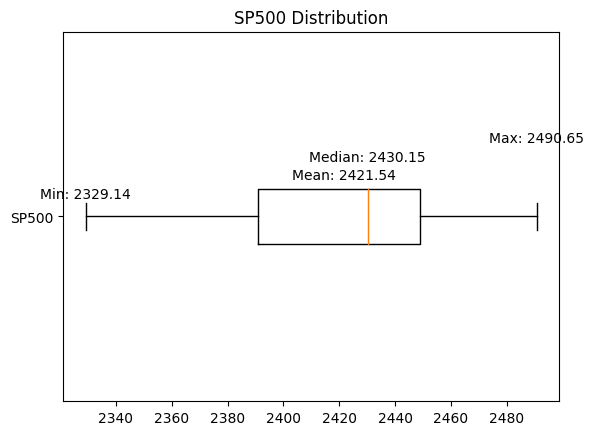

In [38]:

# assuming df2 has a column named "SP500"
data = df1.values.tolist()

fig, ax = plt.subplots()
box = ax.boxplot(data, vert=False, labels=['SP500'])

# Add labels for mean, median, max, and min values
mean = round(pd.Series(data).mean(), 2)
median = round(pd.Series(data).median(), 2)
max_val = round(max(data), 2)
min_val = round(min(data), 2)

ax.text(mean, 1.1, f"Mean: {mean}", fontsize=10, ha='center')
ax.text(median, 1.15, f"Median: {median}", fontsize=10, ha='center')
ax.text(max_val, 1.2, f"Max: {max_val}", fontsize=10, ha='center')
ax.text(min_val, 1.05, f"Min: {min_val}", fontsize=10, ha='center')

ax.set_title('SP500 Distribution')
plt.show()



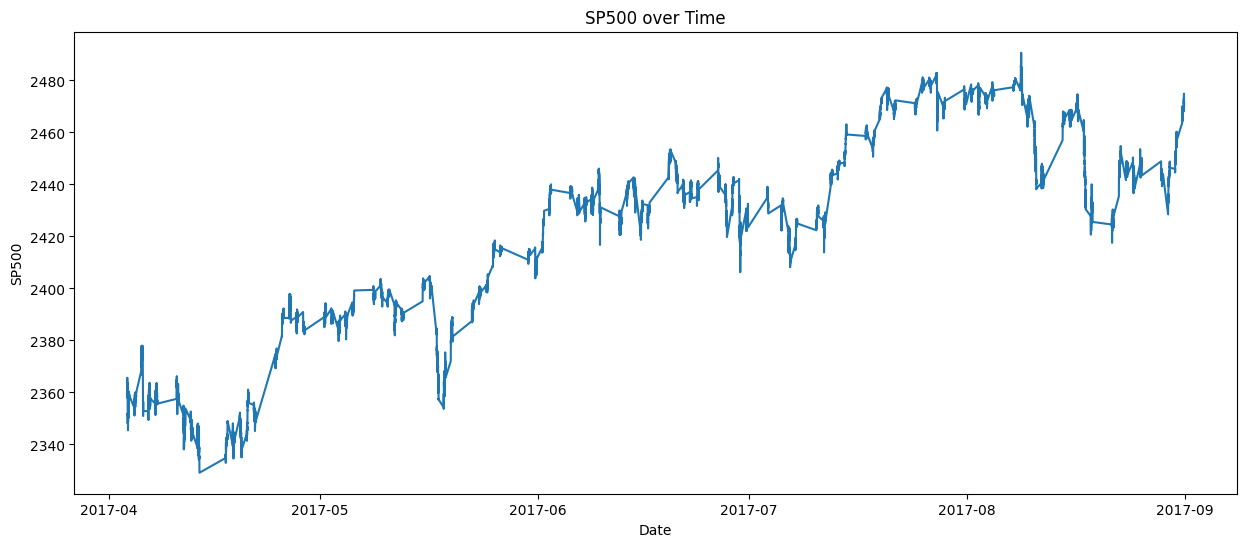

In [15]:
# Create plot of index over time
for col in df.columns:
    if col != 'DATE':  
        plt.figure(figsize=(15, 6))
        plt.plot(df['DATE'], df[col])
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.title(f'{col} over Time')
        plt.show()

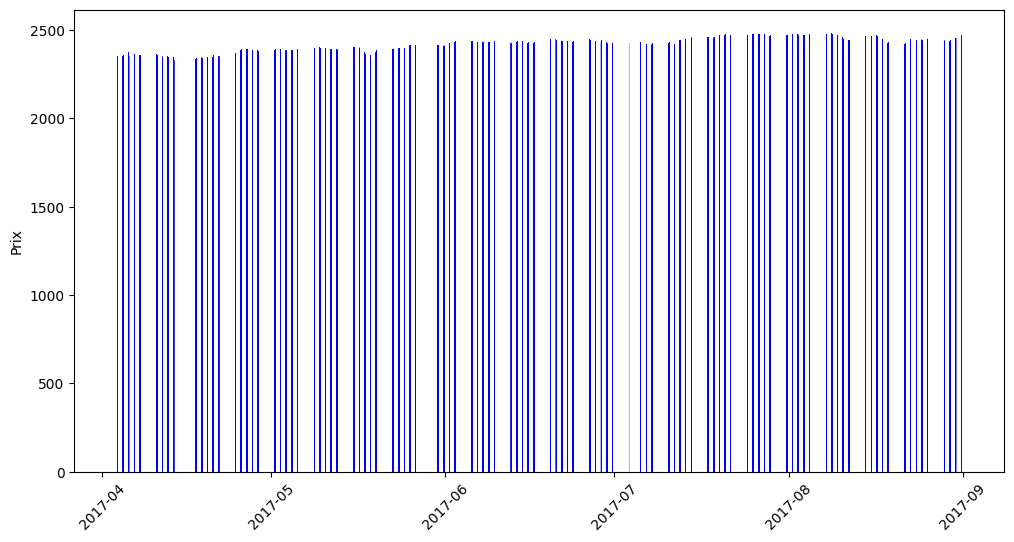

In [380]:
# Convert the date column to a datetime type
df['DATE'] = pd.to_datetime(df['DATE'])

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the volume data
ax.bar(df['DATE'], df['SP500'], color='blue', alpha=0.3, width=0.01)

# Set the y-axis label
ax.set_ylabel('Prix')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [372]:
# Extract the open and close prices into separate arrays

# Filter rows based on 'DATE' column ending with specific times to get the open and close prices 
df_combined_filtered = df_combined[df_combined['DATE'].dt.strftime('%H:%M:%S').str.endswith(('20:00:00', '13:30:00'))]

# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df_combined_filtered)


                     DATE      SP500
0     2017-04-03 13:30:00  2363.6101
390   2017-04-03 20:00:00  2358.9600
391   2017-04-04 13:30:00  2354.1101
781   2017-04-04 20:00:00  2359.9600
782   2017-04-05 13:30:00  2368.3501
1172  2017-04-05 20:00:00  2352.8401
1173  2017-04-06 13:30:00  2352.8401
1563  2017-04-06 20:00:00  2357.6699
1564  2017-04-07 13:30:00  2355.6699
1954  2017-04-07 20:00:00  2355.6899
1955  2017-04-10 13:30:00  2357.5400
2345  2017-04-10 20:00:00  2357.1299
2346  2017-04-11 13:30:00  2351.2700
2736  2017-04-11 20:00:00  2353.8799
2737  2017-04-12 13:30:00  2349.5300
3127  2017-04-12 20:00:00  2344.6299
3128  2017-04-13 13:30:00  2338.7000
3518  2017-04-13 20:00:00  2329.1399
3519  2017-04-17 13:30:00  2334.8201
3909  2017-04-17 20:00:00  2349.0000
3910  2017-04-18 13:30:00  2339.8999
4300  2017-04-18 20:00:00  2342.1101
4301  2017-04-19 13:30:00  2350.4299
4691  2017-04-19 20:00:00  2337.9900
4692  2017-04-20 13:30:00  2344.0601
5082  2017-04-20 20:00:00  2356.0100
5

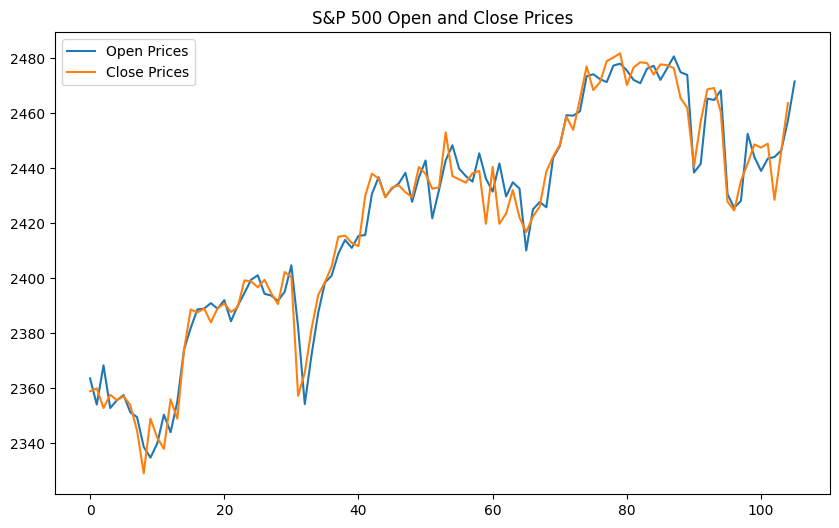

In [473]:
# compare open and close prices 
import matplotlib.pyplot as plt
import pandas as pd

# Extract the open and close prices into separate arrays
open_prices = df_combined_filtered['SP500'].iloc[::2].values
close_prices = df_combined_filtered['SP500'].iloc[1::2].values

# Create a new figure and plot the open and close prices as line charts
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(open_prices, label='Open Prices')
ax.plot(close_prices, label='Close Prices')

# Add a title and legend
ax.set_title('S&P 500 Open and Close Prices')
ax.legend()

# Show the plot
plt.show()


In [32]:
# Extract close prices into separate arrays

# Filter rows based on 'DATE' column ending with specific times to get close prices 
df_combined_filtered2 = df_combined[df_combined['DATE'].dt.strftime('%H:%M:%S').str.endswith(('20:00:00'))]

# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df_combined_filtered2)

                     DATE      SP500
390   2017-04-03 20:00:00  2358.9600
781   2017-04-04 20:00:00  2359.9600
1172  2017-04-05 20:00:00  2352.8401
1563  2017-04-06 20:00:00  2357.6699
1954  2017-04-07 20:00:00  2355.6899
2345  2017-04-10 20:00:00  2357.1299
2736  2017-04-11 20:00:00  2353.8799
3127  2017-04-12 20:00:00  2344.6299
3518  2017-04-13 20:00:00  2329.1399
3909  2017-04-17 20:00:00  2349.0000
4300  2017-04-18 20:00:00  2342.1101
4691  2017-04-19 20:00:00  2337.9900
5082  2017-04-20 20:00:00  2356.0100
5473  2017-04-21 20:00:00  2348.9800
5864  2017-04-24 20:00:00  2374.0200
6255  2017-04-25 20:00:00  2388.6201
6646  2017-04-26 20:00:00  2387.5500
7037  2017-04-27 20:00:00  2388.9900
7428  2017-04-28 20:00:00  2383.9800
7819  2017-05-01 20:00:00  2389.0500
8210  2017-05-02 20:00:00  2390.8401
8601  2017-05-03 20:00:00  2387.7500
8992  2017-05-04 20:00:00  2389.4600
9383  2017-05-05 20:00:00  2399.2200
9774  2017-05-08 20:00:00  2398.8401
10165 2017-05-09 20:00:00  2396.7200
1

Ce code effectue une analyse de tendance sur les données de prix a la cloture de l'indice boursier SP500 en utilisant la moyenne mobile sur une fenêtre donnée.

/var/folders/3t/tnl3lyzn58dczffhgsm53_gm0000gp/T/ipykernel_1173/287004963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered2['DATE'] = pd.to_datetime(df_combined_filtered2['DATE'])


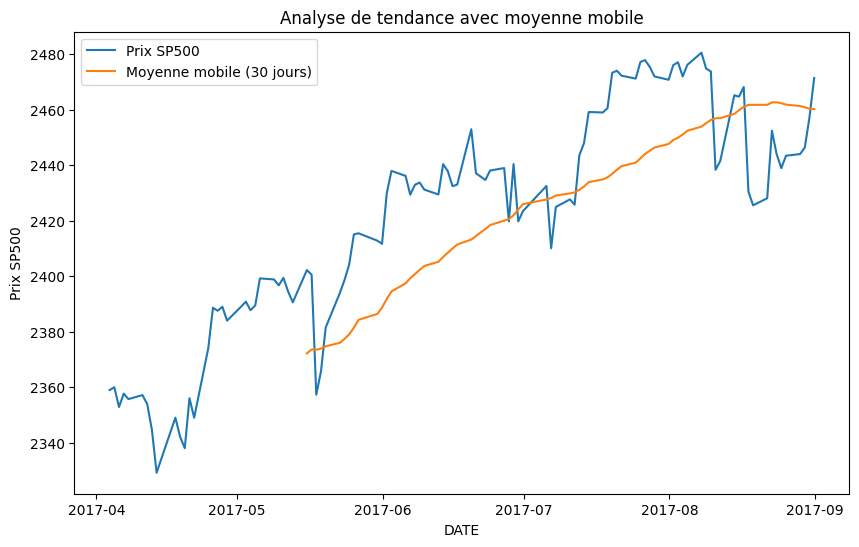

In [33]:
from sklearn.linear_model import LinearRegression

#Convertir la colonne de dates en format de date pandas
df_combined_filtered2['DATE'] = pd.to_datetime(df_combined_filtered2['DATE'])

#Trier les données par date
df_combined_filtered2 = df_combined_filtered2.sort_values('DATE')

# Extraire les colonnes nécessaires pour l'analyse de tendance
df_tendance = df_combined_filtered2[['DATE', 'SP500']]

# Calculer la moyenne mobile sur une fenêtre donnée (par exemple, 30 jours)
window = 30
df_tendance['MoyenneMobile'] = df_tendance['SP500'].rolling(window=window).mean()

# Tracer les données et la moyenne mobile
plt.figure(figsize=(10, 6))
plt.plot(df_tendance['DATE'], df_tendance['SP500'], label='Prix SP500')
plt.plot(df_tendance['DATE'], df_tendance['MoyenneMobile'], label='Moyenne mobile ({} jours)'.format(window))
plt.xlabel('DATE')
plt.ylabel('Prix SP500')
plt.legend()
plt.title('Analyse de tendance avec moyenne mobile')
plt.show()

# Model classique (neural network model)

Ce modèle commence par diviser un ensemble de données en ensembles de données d'entraînement et de test à l'aide de la fonction train_test_split() de la bibliothèque Scikit-learn. Ensuite, il utilise la fonction create_features() pour créer des caractéristiques à partir des données d'entraînement et de test. Les caractéristiques sont créées en utilisant une fenêtre glissante de 20 valeurs de la colonne "SP500" de chaque ligne des données d'entrée.

Ensuite, il construit un modèle de réseau de neurones à l'aide de TensorFlow et Keras. Le modèle utilise une couche d'entrée avec une activation ReLU et une couche de sortie sans activation pour prédire la valeur de sortie. Deux couches Dropout sont ajoutées pour régulariser le modèle et réduire le surajustement.

Le modèle est entraîné à l'aide des données d'entraînement, avec un arrêt précoce pour prévenir le surajustement. Enfin, le modèle est évalué à l'aide des données de test, et des prédictions sont effectuées et visualisées à l'aide de Matplotlib.

In [16]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

def create_features(df):
    X, y = [], []
    for i in range(len(df)-20):
        X.append(df.iloc[i:i+20]["SP500"].values)
        y.append(df.iloc[i+20]["SP500"])
    return np.array(X), np.array(y)

# Create features for training set
X_train, y_train = create_features(train_data)

# Create features for testing set
X_test, y_test = create_features(test_data)

Epoch 1/100
903/903 [==============================] - 3s 2ms/step - loss: 123392.3984 - val_loss: 85527.6406
Epoch 2/100
903/903 [==============================] - 2s 2ms/step - loss: 77305.2969 - val_loss: 73483.2500
Epoch 3/100
903/903 [==============================] - 2s 2ms/step - loss: 72446.0078 - val_loss: 79607.6094
Epoch 4/100
903/903 [==============================] - 2s 2ms/step - loss: 67160.9219 - val_loss: 132725.5625
Epoch 5/100
903/903 [==============================] - 2s 2ms/step - loss: 62573.9492 - val_loss: 81251.7734
Epoch 6/100
903/903 [==============================] - 2s 2ms/step - loss: 59923.3516 - val_loss: 204014.4375
Epoch 7/100
903/903 [==============================] - 2s 2ms/step - loss: 58518.1172 - val_loss: 187235.9844
Epoch 8/100
903/903 [==============================] - 2s 2ms/step - loss: 56669.9219 - val_loss: 172546.1094
Epoch 9/100
903/903 [==============================] - 2s 2ms/step - loss: 55905.4883 - val_loss: 214738.9688
Epoch 10/100


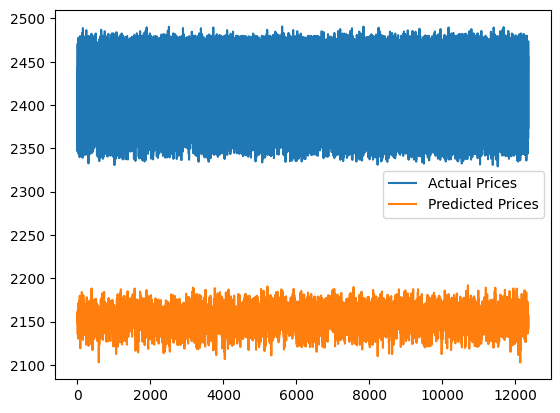

In [17]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Build the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=20))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Use early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Visualize the results
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()



In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 73483.26046325473


In [39]:
import math

x = 73483.26046325473
sqrt_x = math.sqrt(x)

print('Root Mean Squared Error:',sqrt_x)

 Root Mean Squared Error: 271.07796012080127


In [20]:
predictions

array([[2161.5361],
       [2160.8433],
       [2158.842 ],
       ...,
       [2141.5322],
       [2157.9175],
       [2154.5684]], dtype=float32)

# CNN

Ce code construit un modèle de réseau de neurones convolutionnel (CNN) pour prédire les prix, en utilisant les bibliothèques Keras et Tensorflow. Plus précisément, il s'agit d'un modèle 1D de CNN, qui prend en entrée une séquence de 20 valeurs et prédit une seule valeur de sortie.

Le modèle est construit en ajoutant une couche de convolution 1D avec 64 filtres et une taille de noyau de 2, suivie d'une couche de mise en commun (MaxPooling1D) avec une taille de pool de 2. Ensuite, une couche Flatten est ajoutée pour transformer les sorties de la couche de mise en commun en un vecteur unidimensionnel, qui est ensuite alimenté dans une couche Dense avec 50 neurones et une activation relu. Enfin, une dernière couche Dense avec une seule sortie est ajoutée sans activation.

Le modèle est compilé en utilisant l'optimiseur Adam et la fonction de perte mean_squared_error, et est ensuite entraîné sur les données d'entraînement (X_train et y_train) pour 100 époques avec une taille de lot de 32. Une fois l'entraînement terminé, le modèle est évalué sur les données de test (X_test et y_test) à l'aide de la fonction evaluate.

Le modèle est ensuite utilisé pour faire des prédictions sur les données de test, qui sont stockées dans la variable "predictions". Enfin, les prédictions et les vraies valeurs sont tracées en utilisant la bibliothèque matplotlib pour visualiser les résultats.

In [ ]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split

# Reshape the input data for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Epoch 1/100
903/903 [==============================] - 4s 3ms/step - loss: 26630.4141
Epoch 2/100
903/903 [==============================] - 2s 2ms/step - loss: 1766.3657
Epoch 3/100
903/903 [==============================] - 2s 2ms/step - loss: 1801.9210
Epoch 4/100
903/903 [==============================] - 2s 2ms/step - loss: 1882.5712
Epoch 5/100
903/903 [==============================] - 2s 2ms/step - loss: 1960.3882
Epoch 6/100
903/903 [==============================] - 2s 2ms/step - loss: 1894.9122
Epoch 7/100
903/903 [==============================] - 2s 2ms/step - loss: 1925.5625
Epoch 8/100
903/903 [==============================] - 2s 2ms/step - loss: 1966.5917
Epoch 9/100
903/903 [==============================] - 2s 2ms/step - loss: 1907.6663
Epoch 10/100
903/903 [==============================] - 2s 2ms/step - loss: 1867.6088
Epoch 11/100
903/903 [==============================] - 2s 2ms/step - loss: 1974.9387
Epoch 12/100
903/903 [==============================] - 3s 4ms

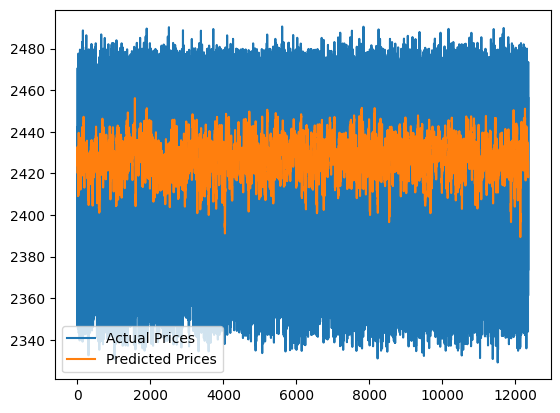

In [413]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(20, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))
 
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
 
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])
 
# Evaluate the model
model.evaluate(X_test, y_test)
 
# Make predictions
predictions = model.predict(X_test)
 
# Visualize the results

import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()

In [414]:
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 1698.5833236326987


In [40]:

x = 1698.5833236326987
sqrt_x = math.sqrt(x)

print('Root Mean Squared Error:',sqrt_x)

Root Mean Squared Error: 41.21387295113987


In [415]:
predictions

array([[2424.0134],
       [2430.8938],
       [2428.7488],
       ...,
       [2418.7625],
       [2418.148 ],
       [2418.74  ]], dtype=float32)

In [24]:
# get the shape of the array
shape = predictions.shape

# print the shape
print(shape)   # Output: (3, 4)

(12360, 1)


# CLTN

Ce code définit une couche personnalisée appelée "CLTNLayer" dans Keras, qui est basée sur l'architecture CLTN (Complex-valued Linear Transformation Network).

La couche CLTNLayer prend un tenseur 3D en entrée, où la première dimension représente la taille du lot, la deuxième dimension représente les pas de temps et la troisième dimension représente les caractéristiques d'entrée. La couche applique une transformation linéaire à valeurs complexes à l'entrée, où les parties réelles et imaginaires de l'entrée sont traitées séparément. La sortie de la couche est un tenseur 3D avec la même taille de lot et les mêmes pas de temps que l'entrée, mais avec un nombre différent de caractéristiques de sortie (défini par le paramètre "units").

La couche est mise en œuvre à l'aide du backend Keras, qui permet de manipuler facilement l'entrée et les poids à l'aide d'opérations de bas niveau. La couche se compose de poids entraînables (kernel_r, kernel_i, bias_r et bias_i), qui sont initialisés à l'aide de l'initialisateur uniforme Glorot et optimisés pendant l'entraînement à l'aide de la rétropropagation.

Dans l'ensemble, la couche CLTN est une couche personnalisée qui peut être utilisée dans les modèles Keras pour les données à valeurs complexes, comme dans les applications de traitement du signal.

In [416]:
# Import the required libraries
from keras.models import Model
from keras.layers import Input, Dense, Lambda, Concatenate, Dropout
from keras import backend as K
from keras.layers import Layer

# Define the CLTN layer
class CLTNLayer(Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        super(CLTNLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.kernel_r = self.add_weight(name='kernel_r',
                                         shape=(input_shape[2], self.units),
                                         initializer='glorot_uniform',
                                         trainable=True)
        self.kernel_i = self.add_weight(name='kernel_i',
                                         shape=(input_shape[2], self.units),
                                         initializer='glorot_uniform',
                                         trainable=True)
        self.bias_r = self.add_weight(name='bias_r',
                                       shape=(self.units,),
                                       initializer='zeros',
                                       trainable=True)
        self.bias_i = self.add_weight(name='bias_i',
                                       shape=(self.units,),
                                       initializer='zeros',
                                       trainable=True)
        super(CLTNLayer, self).build(input_shape)
    
    def call(self, inputs):
        real = K.dot(inputs[:,0,:], self.kernel_r) + self.bias_r
        imag = K.dot(inputs[:,0,:], self.kernel_i) + self.bias_i
        return K.stack([real, imag], axis=2)
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], 1, self.units*2)



Epoch 1/100
903/903 [==============================] - 3s 2ms/step - loss: 142265.9844
Epoch 2/100
903/903 [==============================] - 1s 2ms/step - loss: 19526.9219
Epoch 3/100
903/903 [==============================] - 1s 2ms/step - loss: 19676.7715
Epoch 4/100
903/903 [==============================] - 1s 2ms/step - loss: 19745.4121
Epoch 5/100
903/903 [==============================] - 2s 2ms/step - loss: 19619.2793
Epoch 6/100
903/903 [==============================] - 2s 2ms/step - loss: 19283.6016
Epoch 7/100
903/903 [==============================] - 3s 3ms/step - loss: 18392.7109
Epoch 8/100
903/903 [==============================] - 2s 2ms/step - loss: 18565.4980
Epoch 9/100
903/903 [==============================] - 2s 2ms/step - loss: 18179.6934
Epoch 10/100
903/903 [==============================] - 2s 2ms/step - loss: 17749.0000
Epoch 11/100
903/903 [==============================] - 2s 2ms/step - loss: 17686.0508
Epoch 12/100
903/903 [=============================

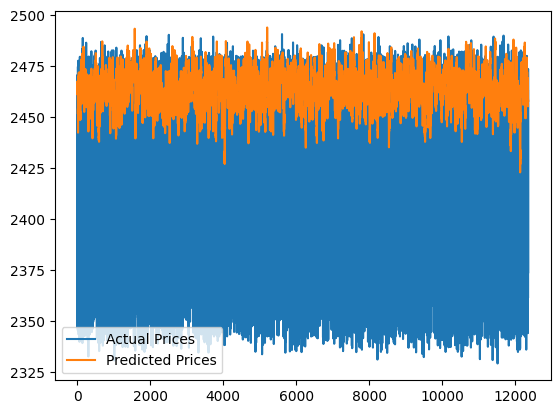

In [417]:
# Define the input layer
inputs = Input(shape=(20, 1))

# Add the CLTN layer
cltn_layer = CLTNLayer(units=50)(Lambda(lambda x: K.permute_dimensions(x, (0, 2, 1)))(inputs))

# Flatten the output
flatten_layer = Flatten()(cltn_layer)

# Add dropout layer to reduce overfitting
dropout_layer = Dropout(0.2)(flatten_layer)

# Add a dense layer
dense_layer = Dense(units=1)(dropout_layer)

# Define the output layer
output = Lambda(lambda x: x, name='output')(dense_layer)

# Define the model
model = Model(inputs=[inputs], outputs=[output])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32,callbacks=[early_stop])

# Evaluate the model
model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Visualize the results
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()

In [418]:
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 3489.610858188997


In [41]:
x = 3489.610858188997
sqrt_x = math.sqrt(x)

print('Root Mean Squared Error:',sqrt_x)

Root Mean Squared Error: 59.072928302133434


In [401]:
predictions

array([[2324.1292],
       [2326.5881],
       [2326.4602],
       ...,
       [2317.736 ],
       [2317.5422],
       [2318.9106]], dtype=float32)

# LSTM

LSTM: 
Ce code définit un modèle LSTM utilisant Keras pour effectuer la prédiction de séries temporelles. Il importe les paquets et bibliothèques nécessaires, y compris numpy, pandas et Keras. Il définit le nombre d'étapes temporelles précédentes à utiliser comme entrée pour le modèle LSTM.
Il crée un modèle séquentiel dans Keras et ajoute deux couches LSTM avec 50 unités chacune, suivies de couches d'abandon avec un taux d'abandon de 0,2, et une couche de sortie dense avec une unité. Il compile le modèle en utilisant la perte par erreur quadratique moyenne et l'optimiseur Adam.
Il entraîne le modèle à l'aide de la fonction fit() avec les données d'entraînement (X_train et y_train) pour 200 époques et une taille de lot de 32.
Il utilise le modèle entraîné pour effectuer des prédictions sur les ensembles de données d'entraînement et de test (X_train et X_test) et stocke les valeurs prédites dans trainPredict et testPredict.
Enfin, il visualise les résultats en traçant les valeurs réelles (y_train et y_test) avec les valeurs prédites (trainPredict et testPredict) à l'aide de Matplotlib.


Epoch 1/200
1289/1289 [==============================] - 14s 8ms/step - loss: 0.0067
Epoch 2/200
1289/1289 [==============================] - 10s 8ms/step - loss: 0.0020
Epoch 3/200
1289/1289 [==============================] - 10s 8ms/step - loss: 0.0013
Epoch 4/200
1289/1289 [==============================] - 10s 8ms/step - loss: 7.8068e-04
Epoch 5/200
1289/1289 [==============================] - 11s 8ms/step - loss: 6.2132e-04
Epoch 6/200
1289/1289 [==============================] - 12s 9ms/step - loss: 5.9539e-04
Epoch 7/200
1289/1289 [==============================] - 10s 8ms/step - loss: 5.6744e-04
Epoch 8/200
1289/1289 [==============================] - 11s 9ms/step - loss: 5.5610e-04
Epoch 9/200
1289/1289 [==============================] - 11s 8ms/step - loss: 5.7906e-04
Epoch 10/200
1289/1289 [==============================] - 11s 8ms/step - loss: 5.3988e-04
Epoch 11/200
1289/1289 [==============================] - 11s 9ms/step - loss: 5.5121e-04
Epoch 12/200
1289/1289 [=======

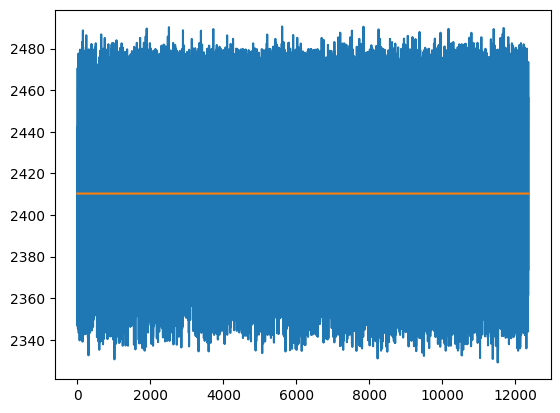

In [442]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf


# Select only the numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df[num_cols])


# Define the number of previous time steps to use as input
look_back = 20

# Create the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Create the time series generator for the training data
train_data_gen = TimeseriesGenerator(data, data, length=look_back, batch_size=32)

# Train the model
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
with tf.device('/GPU:0'):
    model.fit(train_data_gen, epochs=200, callbacks=[early_stop])

# Make predictions
trainPredict = model.predict(train_data_gen)

# Inverse transform the predictions and actual data
trainPredict = scaler.inverse_transform(trainPredict)
data = scaler.inverse_transform(data)

# Visualize the results
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(testPredict)
plt.show()



In [445]:
mse = mean_squared_error(y_test, testPredict)
print('Mean Squared Error:', mse)

Mean Squared Error: 1699.2274295223804


In [42]:
x = 1699.2274295223804
sqrt_x = math.sqrt(x)

print('Root Mean Squared Error:',sqrt_x)

Root Mean Squared Error: 41.22168639833141


In [444]:
testPredict

array([[2410.338],
       [2410.338],
       [2410.338],
       ...,
       [2410.338],
       [2410.338],
       [2410.338]], dtype=float32)

# MLP Regression

Ce code implémente un modèle de régression à couches multiples MLP (Multilayer Perceptron) à l'aide de la bibliothèque Scikit-learn en utilisant la classe MLPRegressor. Plus spécifiquement, il s'agit d'un réseau de neurones artificiels avec une fonction d'activation tanh et cinq couches cachées, chacune ayant 500 nœuds.

In [25]:
#Model 1 : MLP Regression

from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Instantiate MLPRegressor
#
NN = MLPRegressor(
    activation='tanh',
    hidden_layer_sizes=(500, 500, 500, 500, 500),
    alpha=0.001,
    random_state=20,
    early_stopping=False
)

# Train the model

NN.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.001,
             hidden_layer_sizes=(500, 500, 500, 500, 500), random_state=20)

In [26]:
from sklearn.metrics import mean_squared_error
 
# Make prediction
pred = NN.predict(X_test)

# Calculate accuracy and error metrics

test_set_rsquared = NN.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))

# Print R_squared and RMSE value

print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

R_squared value:  -0.00037975629773345787
RMSE:  39.81643260622925


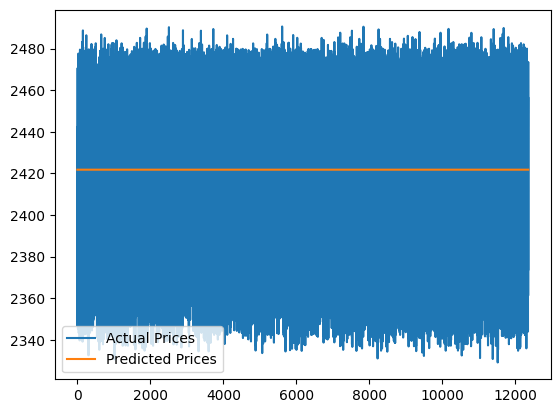

In [27]:
# Visualize the results
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual Prices')
plt.plot(pred, label='Predicted Prices')
plt.legend()
plt.show()

In [30]:
pred

array([2421.81323627, 2421.81323627, 2421.81323627, ..., 2421.81323627,
       2421.81323627, 2421.81323627])

# SVR

Ce code implémente un modèle de régression SVM (Support Vector Machine) à noyau RBF (Radial Basis Function) pour prédire des valeurs de sortie (y) à partir de données d'entrée (X) sur un ensemble de données d'entraînement (X_train, y_train).

Le modèle est créé en utilisant la classe SVR du module sklearn.svm. L'instance du modèle est stockée dans la variable "clf".

Le modèle est ajusté aux données d'entraînement à l'aide de la méthode "fit" du modèle SVM en utilisant les données d'entrée d'entraînement (X_train) et les valeurs de sortie d'entraînement (y_train).

Une fois que le modèle a été ajusté, les valeurs de sortie sont prédites pour l'ensemble de données de test (X_test) à l'aide de la méthode "predict" du modèle SVM. Les prédictions sont stockées dans la variable "predict_y".


In [28]:
#Model SVR : 

from numpy import sqrt 
from sklearn.svm import SVR
# design svm model
clf = SVR()

# fit model
clf.fit(X_train,y_train)

# make a prediction

predict_y = clf.predict(X_test)

print(predict_y.shape,X_test.shape)

# calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predict_y))
print('Test RMSE: %.3f' % rmse)

(12360,) (12360, 20)
Test RMSE: 40.924


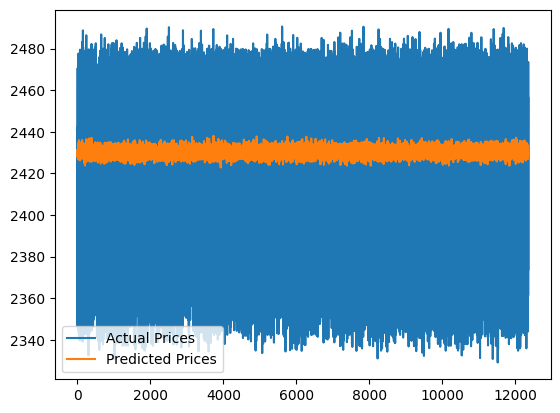

In [29]:
# Visualize the results
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual Prices')
plt.plot(predict_y, label='Predicted Prices')
plt.legend()
plt.show()

In [31]:
predict_y

array([2430.98619319, 2430.58157582, 2429.74494668, ..., 2431.56250842,
       2428.75235166, 2429.71709548])